In [13]:
import gensim
import gensim.downloader as api
from gensim.test.utils import common_texts
from gensim.models import Word2Vec


In [14]:
print(common_texts[0])
print(common_texts[1])
model1 = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
print(model1.wv.key_to_index)

['human', 'interface', 'computer']
['survey', 'user', 'computer', 'system', 'response', 'time']
{'system': 0, 'graph': 1, 'trees': 2, 'user': 3, 'minors': 4, 'eps': 5, 'time': 6, 'response': 7, 'survey': 8, 'computer': 9, 'interface': 10, 'human': 11}


In [15]:

model1.wv['computer'] 
model1.wv.most_similar('computer', topn=2)


[('system', 0.21617141366004944), ('survey', 0.04468922317028046)]

In [16]:
gensim.downloader.info()['models'].keys()
model = api.load("word2vec-google-news-300")

In [17]:
result1 = model.most_similar(positive=["king", "woman"], negative=["man"])
resutl2 = model.most_similar(positive=["France", "Athens"], negative=["Paris"])
result3 = model.most_similar(positive=["man", "nurse"], negative=["doctor"])
print(result1)
print(resutl2)
print(result3)

[('queen', 0.7118192911148071), ('monarch', 0.6189674735069275), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134343147278), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411403656006)]
[('Greece', 0.6378624439239502), ('Ioannis_Drymonakos', 0.5528172254562378), ('Greeks', 0.5402373671531677), ('Slovenia', 0.5302708745002747), ('BBC_Malcolm_Brabant', 0.5291168093681335), ('Macedonia', 0.5231454372406006), ('Periklis_Iakovakis', 0.5216149687767029), ('Lithuania', 0.5196155309677124), ('Karaiskaki_stadium', 0.519192099571228), ('Aristeidis_Grigoriadis', 0.5186524391174316)]
[('woman', 0.6514645218849182), ('teenage_girl', 0.5248744487762451), ('girl', 0.5228493809700012), ('suspected_purse_snatcher', 0.5100316405296326), ('boy', 0.5027772784233093), ('teenager', 0.49789366126060486), ('Leah_Questin', 0.47419875860214233), ('Suspected_burgl

In [18]:
# visualization utility function.
# This should work as is.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

sns.set_style('whitegrid')
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

def tsne_scatterplot(model, search_word, topn):
    labels = [search_word]
    tokens = [model[search_word]]
    similar = [1]
    close_words = model.similar_by_word(search_word, topn=topn)
    for word in close_words:
        tokens.append(model[word[0]])
        labels.append(word[0])
        similar.append(word[1])

    tsne_model = TSNE(n_components=2, perplexity=topn, init='pca')
    coordinates = tsne_model.fit_transform(np.array(tokens))
    df = pd.DataFrame({'x': [x for x in coordinates[:, 0]],
                       'y': [y for y in coordinates[:, 1]],
                       'words': labels,
                       'similarity': similar}
                      )
    fig, ax = plt.subplots()
    plot = ax.scatter(df.x, df.y, c=df.similarity, cmap='Reds')
    for i in range(len(df)):
        ax.annotate("  {} ({:.2f})".format(df.words[i].title(),
                                           df.similarity[i]),
                    (df.x[i], df.y[i]))

    plt.colorbar(mappable=plot, ax=ax)
    plt.title('t-SNE visualization for {}'.format(search_word))
    plt.show()

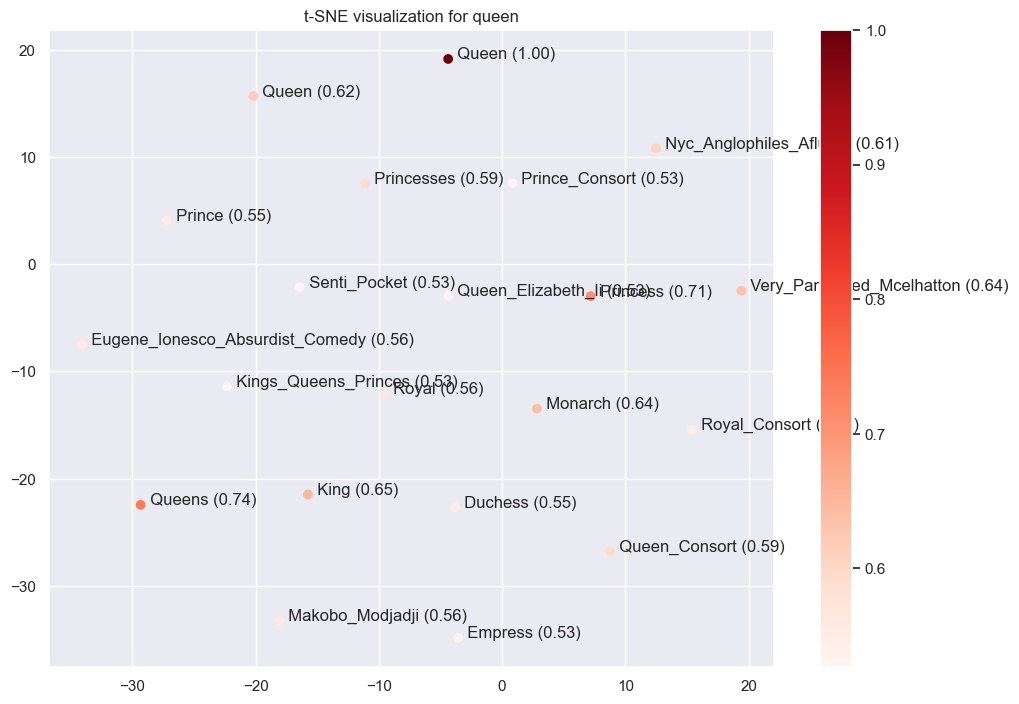

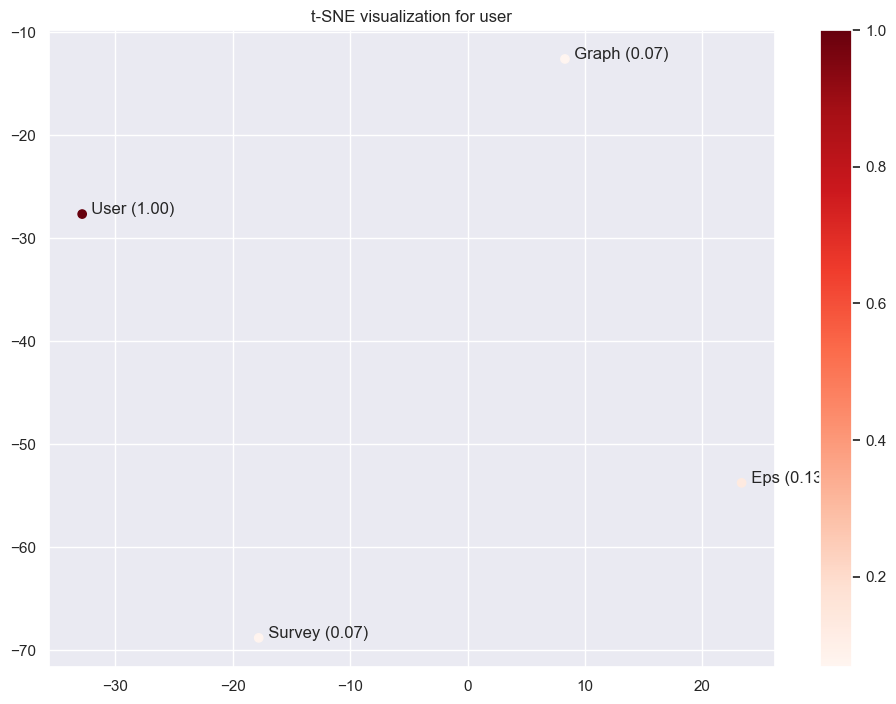

In [19]:
tsne_scatterplot(model, 'queen', 20)
tsne_scatterplot(model1.wv, 'user', 3)

In [20]:
import urllib.request #Externe Hilfe benötigt
import zipfile

urllib.request.urlretrieve("http://mattmahoney.net/dc/text8.zip", "text8.zip")
with zipfile.ZipFile("text8.zip") as zf:
    text = zf.read("text8").decode("utf-8")

tokens = text.split()
print(tokens[:20])


['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english']


In [21]:
from collections import Counter

word_counts = Counter([w.lower() for w in tokens])
print(word_counts.most_common(10))
print(len(word_counts))


vocab = {}
min_count = 5
idx = 0

for word, count in word_counts.items():
    if count >= min_count:
        vocab[word] = idx
        idx += 1

print(len(vocab))
print(vocab)

[('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764), ('in', 372201), ('a', 325873), ('to', 316376), ('zero', 264975), ('nine', 250430), ('two', 192644)]
253854
71290
{'anarchism': 0, 'originated': 1, 'as': 2, 'a': 3, 'term': 4, 'of': 5, 'abuse': 6, 'first': 7, 'used': 8, 'against': 9, 'early': 10, 'working': 11, 'class': 12, 'radicals': 13, 'including': 14, 'the': 15, 'diggers': 16, 'english': 17, 'revolution': 18, 'and': 19, 'sans': 20, 'culottes': 21, 'french': 22, 'whilst': 23, 'is': 24, 'still': 25, 'in': 26, 'pejorative': 27, 'way': 28, 'to': 29, 'describe': 30, 'any': 31, 'act': 32, 'that': 33, 'violent': 34, 'means': 35, 'destroy': 36, 'organization': 37, 'society': 38, 'it': 39, 'has': 40, 'also': 41, 'been': 42, 'taken': 43, 'up': 44, 'positive': 45, 'label': 46, 'by': 47, 'self': 48, 'defined': 49, 'anarchists': 50, 'word': 51, 'derived': 52, 'from': 53, 'greek': 54, 'without': 55, 'archons': 56, 'ruler': 57, 'chief': 58, 'king': 59, 'political': 60, 'philosop

In [22]:
unk_idx = vocab.get("<unk>")

indexed_tokens = [
    vocab[word] for word in tokens if word in vocab
]

result = []
window_size = 2 # veränderbar

for i, center in enumerate(indexed_tokens):
    for j in range(max(i - window_size, 0), min(i + window_size + 1, len(indexed_tokens))):
        if i != j:
            result.append((center, indexed_tokens[j]))
print(result[:10])

[(0, 1), (0, 2), (1, 0), (1, 2), (1, 3), (2, 0), (2, 1), (2, 3), (2, 4), (3, 1)]


In [23]:
# Klasse ist Norm für PyTorch Dataset

import torch
from torch.utils.data import Dataset

class SkipGramDataset(Dataset):

    def __init__(self, pairs):
        self.pairs = pairs  #meine Tuples

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        center, context = self.pairs[idx]
        return torch.tensor(center, dtype=torch.long), torch.tensor(context, dtype=torch.long)



In [24]:
dataset = SkipGramDataset(result)
print(len(dataset))
print(dataset[0])  # z. B. (tensor(12), tensor(98))


66875370
(tensor(0), tensor(1))


In [25]:
from torch.utils.data import DataLoader

loader = DataLoader(dataset, batch_size=128, shuffle=True)

#for batch in loader:
#    centers, contexts = batch


In [26]:
import torch.nn as nn

class SkipGramModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.in_embeddings = nn.Embedding(vocab_size, embedding_dim) #Zahl->Vektor
        self.out_embeddings = nn.Embedding(vocab_size, embedding_dim)

    def forward(self, center_words):
        center_vecs = self.in_embeddings(center_words)  #(B, D)
        output_vecs = self.out_embeddings.weight         # (V, D)
        scores = torch.matmul(center_vecs, output_vecs.t())  # (B, V)
        return scores


In [27]:
embedding_dim = 32
vocab_size = len(vocab)

model = SkipGramModel(vocab_size, embedding_dim)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
i = 0
for epoch in range(2):
    for centers, contexts in loader:

        if i % 1000:
            print(f"Loss: {loss.item():.4f}")
        i += 1

        optimizer.zero_grad() # Gradienten zurücksetzen, sonst addition
        output = model(centers)
        loss = loss_fn(output, contexts)
        loss.backward()
        optimizer.step()

        


In [29]:
torch.save(model.state_dict(), "sgns_model.pth")
model.load_state_dict(torch.load("sgns_model.pth"))


<All keys matched successfully>

In [30]:
embeddings = model.in_embeddings.weight.detach()  # Shape: [vocab_size, embedding_dim]

import torch
import torch.nn.functional as F

def get_similar_words(word, vocab, embeddings, topn=5):
    word_idx = vocab.get(word, None)
    if word_idx is None:
        return f"'{word}' not in vocab"

    word_vec = embeddings[word_idx]                     # Vektor des gesuchten Worts
    sims = F.cosine_similarity(word_vec.unsqueeze(0), embeddings)  # Ähnlichkeit zu allen anderen

    top_indices = sims.topk(topn + 1).indices[1:]       # [1:] → topn ohne sich selbst
    idx_to_word = {idx: w for w, idx in vocab.items()}
    return [(idx_to_word[i.item()], sims[i].item()) for i in top_indices]

get_similar_words("monster", vocab, embeddings)


[('ioi', 0.7408272624015808),
 ('latent', 0.668209433555603),
 ('aldwych', 0.6598236560821533),
 ('pandit', 0.6594243049621582),
 ('alleganiensis', 0.6498160362243652)]

In [31]:
import random
class SkipGramNSDataset(Dataset):
    def __init__(self, pairs, vocab, k_neg=5):
        self.pairs = pairs                  # Liste aus (center, context)-Tuples
        self.vocab = vocab
        self.k = k_neg                      # negative Beispiele pro Paar
        self.word_indices = list(vocab.values())  # Alle Wort-IDs zum Samplen, unschön: random.randint

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        center, context = self.pairs[idx]

        negatives = []
        while len(negatives) < self.k:
            negative = random.choice(self.word_indices)
            if negative != context and negative != center:
                negatives.append(negative)

        return (
            torch.tensor(center, dtype=torch.long),
            torch.tensor(context, dtype=torch.long),
            torch.tensor(negatives, dtype=torch.long)
        )


In [32]:
class SGNSModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.in_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.out_embeddings = nn.Embedding(vocab_size, embedding_dim)

    def forward(self, center, context, negatives):
        # 1. Vektoren holen
        center_vecs = self.in_embeddings(center)            # shape: [batch_size, embed_dim]
        context_vecs = self.out_embeddings(context)         # shape: [batch_size, embed_dim]
        negative_vecs = self.out_embeddings(negatives)      # shape: [batch_size, K, embed_dim]

        # 2. Positive score: u_t * v_c
        pos_score = torch.sum(center_vecs * context_vecs, dim=1)

        # 3. Negative score: u_t * v_j
        neg_score = torch.bmm(negative_vecs, center_vecs.unsqueeze(2)).squeeze(2)

        # 4. SGNS Loss
        pos_loss = -torch.log(torch.sigmoid(pos_score) + 1e-10)#damti log(0) nicht entsteht
        neg_loss = -torch.sum(torch.log(torch.sigmoid(-neg_score) + 1e-10), dim=1)

        return (pos_loss + neg_loss).mean()


In [34]:
# ⚙️ Hyperparameter
import torch

embedding_dim = 32
batch_size = 128
epochs = 3
k_neg = 5
lr = 0.003
context_window = 2
pairs = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for i in range(context_window, len(indexed_tokens) - context_window):
    center = indexed_tokens[i]
    context = indexed_tokens[i - context_window : i] + indexed_tokens[i + 1 : i + context_window + 1]
    for ctx in context:
        pairs.append((center, ctx))


# 🧱 Dataset & Loader (du musst pairs & vocab vorher erzeugt haben!)
dataset = SkipGramNSDataset(pairs, vocab, k_neg=k_neg)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 📦 Modell & Optimizer
model = SGNSModel(vocab_size=len(vocab), embedding_dim=embedding_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# 🔁 Trainingsloop
step = 0
for epoch in range(epochs):
    for center, context, negatives in loader:
        center = center.to(device)
        context = context.to(device)
        negatives = negatives.to(device)

        loss = model(center, context, negatives)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if step % 100 == 0:
            print(f"Epoch {epoch+1}, Step {step}, Loss: {loss.item():.4f}")
        step += 1


KeyboardInterrupt: 

In [40]:
# Speichere das Modell nach jedem Epoch
torch.save(model.state_dict(), "sgns_model.pt")


In [41]:
embeddings = model.in_embeddings.weight.detach()
get_similar_words("queen", vocab, embeddings)


[('father', 0.7817528247833252),
 ('princess', 0.7554203271865845),
 ('wife', 0.7547070980072021),
 ('elizabeth', 0.7535083293914795),
 ('mother', 0.752293586730957)]